## Importing Libraries

In [642]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve

## Reading & Understanding Dataset 

In [643]:
lead = pd.read_csv('C://Users//dipte//Downloads//Lead+Scoring+Case+Study//Lead Scoring Assignment//Leads.csv')
# Displaying the first few rows of the dataset
print("First Five Rows of the Dataset:")
display(lead.head())

# Displaying information about the DataFrame
print("\nDataFrame Information:")
display(lead.info())

# Displaying statistical summary of the DataFrame
print("\nStatistical Summary of the DataFrame:")
display(lead.describe())

# Displaying the shape of the DataFrame
print("\nShape of the DataFrame:")
print(lead.shape)

First Five Rows of the Dataset:


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit        

None


Statistical Summary of the DataFrame:


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000



Shape of the DataFrame:
(9240, 37)


## Data Cleanup

##### Replacing Missing Data with 'Unknown'

In [644]:
lead = lead.replace('Select','Unknown')
display(lead.head(5))

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Unknown,Unknown,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Unknown,Unknown,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Unknown,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Unknown,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Checking for Duplicate Data

In [645]:
lead_dup = lead.copy()

print(lead_dup.duplicated().sum())

# Checking the uniqueness for all columns
unique_values_dict = lead.nunique()
is_unique_dict = {col: lead[col].is_unique for col in lead.columns}

# Printing the number of unique values and whether each column is unique
print("Number of Unique Values per Column:")
print(unique_values_dict)
print("\nUniqueness of Each Column:")
print(is_unique_dict)

# Dropping Lead Number and Prospect ID since they have all unique values

lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
lead.shape

0
Number of Unique Values per Column:
Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                    

(9240, 35)

#### Checking & Treating Missing Values

##### 1. Dropping columns with more than 45% NaN values
##### 2. Listing and treating columns with less than 2% NaN values

In [646]:
null_val = (lead.isnull().mean()*100)
display(null_val)

# Listing columns with more than 45% NaN values

null_above_45 = null_val[null_val>45]
print(null_above_45)

# Dropping null values above 45%

lead = lead.drop(null_above_45.index, axis=1)
print(lead.shape)


# Listing columns with less than 2% NaN values
null_below_2 = null_val[(null_val > 0) & (null_val < 2)].index.tolist()
print(null_below_2)

# Now lets analyse each columns
# Iterating over each column and displaying the value counts as percentages
for col in null_below_2:
    print(f"Value Counts for {col} (as %):")
    display(lead[col].value_counts(normalize=True, dropna=False) * 100)
    print("\n" + "-"*50 + "\n")  # Separator for readability

# Lets simplify the columns and reduce the complexity of categorical values

lead['Lead Source'] = lead['Lead Source'].replace({'google': 'Google', 'Facebook': 'Social Media', 'bing': 'Others', 'Click2call': 'Others', 'Press_Release': 'Others', 'youtubechannel': 'Others', 'welearnblog_Home': 'Others', 'WeLearn': 'Others', 'blog': 'Others', 'Pay per Click Ads': 'Others', 'testone': 'Others', 'NC_EDM': 'Others', 'Live Chat': 'Others'})
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Marked Spam', 'Email Received', 'Resubscribed to emails', 'Visited Booth in Tradeshow'], 'Others')

# Displaying the results
print("Value Counts for 'Lead Source' After Modification:")
display(lead['Lead Source'].value_counts())

print("\nValue Counts for 'Last Activity' After Modification:")
display(lead['Last Activity'].value_counts())


# Dropping rows with columns having missing values less than 2%.

for i in null_below_2: 
    lead = lead[lead[i].notna()]

# Display the number of rows after filtering
print("Number of rows in 'lead' after removing nulls:", len(lead))

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64
(9240, 30)
['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']
Value Counts for Lead Source (as %):


Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64


--------------------------------------------------

Value Counts for TotalVisits (as %):


0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
24.0      0.054113
25.0      0.054113
27.0      0.054113
22.0      0.032468
29.0      0.021645
28.0      0.021645
26.0      0.021645
141.0     0.010823
55.0      0.010823
30.0      0.010823
43.0      0.010823
74.0      0.010823
41.0      0.010823
54.0      0.010823
115.0     0.010823
251.0     0.010823
32.0      0.010823
42.0      0.010823
Name: TotalVisits, dtype: float64


--------------------------------------------------

Value Counts for Page Views Per Visit (as %):


0.00    23.690476
2.00    19.426407
3.00    12.943723
4.00     9.696970
1.00     7.045455
          ...    
2.56     0.010823
6.33     0.010823
1.64     0.010823
8.21     0.010823
2.08     0.010823
Name: Page Views Per Visit, Length: 115, dtype: float64


--------------------------------------------------

Value Counts for Last Activity (as %):


Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64


--------------------------------------------------

Value Counts for 'Lead Source' After Modification:


Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                21
Name: Lead Source, dtype: int64


Value Counts for 'Last Activity' After Modification:


Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

Number of rows in 'lead' after removing nulls: 9074


Lets look at other columns

In [647]:

def display_value_counts(column, replacements=None, default_replacement=None):
    """
    Replaces values in a column and displays value counts before and after replacement.

    :param column: Column name to process.
    :param replacements: Dictionary of values to replace.
    :param default_replacement: Default value to replace NaNs.
    """
    print(f"Value Counts for '{column}' Before Replacement:")
    display(lead[column].value_counts(normalize=True, dropna=False) * 100)

    # Replace specified values
    if replacements:
        lead[column] = lead[column].replace(replacements)

    # Replace NaN values with a default replacement if specified
    if default_replacement is not None:
        lead[column] = lead[column].replace(np.nan, default_replacement)

    # Display value counts after replacement
    print(f"\nValue Counts for '{column}' After Replacement:")
    display(lead[column].value_counts(normalize=True, dropna=False) * 100)

# Process columns with value replacements
display_value_counts('Country', default_replacement='Unknown')
display_value_counts('Specialization', replacements={
    'Finance Management':'Management_Specializations',
    'Human Resource Management':'Management_Specializations',
    'Marketing Management':'Management_Specializations',
    'Operations Management':'Management_Specializations',
    'IT Projects Management':'Management_Specializations',
    'Supply Chain Management':'Management_Specializations',
    'Healthcare Management':'Management_Specializations',
    'Hospitality Management':'Management_Specializations',
    'Retail Management':'Management_Specializations'
}, default_replacement='Unknown')
display_value_counts('What is your current occupation', default_replacement='Unknown')
display_value_counts('How did you hear about X Education', default_replacement='Unknown')
display_value_counts('What matters most to you in choosing a course', default_replacement='Unknown')
display_value_counts('Tags', replacements={
    'switched off':'Others', 'opp hangup':'Others', 'Still Thinking':'Others',
    'Already a student':'Others', 'in touch with EINS':'Others', 'Lost to Others':'Others',
    'number not provided':'Others', 'Not doing further education':'Others',
    'Want to take admission but has financial problems':'Others', 'invalid number':'Others',
    'In confusion whether part time or DLP':'Others', 'Interested in Next batch':'Others',
    'wrong number given':'Others', 'Shall take in the next coming month':'Others',
    'Lateral student':'Others', 'Interested in full time MBA':'Others',
    'Recognition issue (DEC approval)':'Others', 'University not recognized':'Others'
}, default_replacement='Unknown')
display_value_counts('City', default_replacement='Mumbai')

# Dropping columns with explanations
# Dropping 'How did you hear about X Education' because a majority is 'Unknown', making it less useful for analysis
lead.drop(['How did you hear about X Education'], axis=1, inplace=True)
print("Column 'How did you hear about X Education' dropped due to high proportion of 'Unknown' values.")

# Dropping 'Receive More Updates About Our Courses' because it has only one value 'No', providing no variability
lead.drop(['Receive More Updates About Our Courses'], axis=1, inplace=True)
print("Column 'Receive More Updates About Our Courses' dropped due to lack of variability.")

# Dropping 'Lead Profile' because a majority is 'Unknown', making it less useful for analysis
lead.drop('Lead Profile', axis=1, inplace=True)
print("Column 'Lead Profile' dropped due to high proportion of 'Unknown' values.")

# Final null value percentage check
print("\nFinal Null Value Percentage After Treatment:")
print(lead.isnull().mean() * 100)




Value Counts for 'Country' Before Replacement:


India                   71.534053
NaN                     25.303064
United States            0.760414
United Arab Emirates     0.584086
Singapore                0.264492
Saudi Arabia             0.231430
United Kingdom           0.165307
Australia                0.143266
Qatar                    0.110205
Bahrain                  0.077143
Hong Kong                0.077143
Oman                     0.066123
France                   0.066123
unknown                  0.055102
Kuwait                   0.044082
South Africa             0.044082
Canada                   0.044082
Nigeria                  0.044082
Germany                  0.044082
Sweden                   0.033061
Philippines              0.022041
Uganda                   0.022041
Italy                    0.022041
Bangladesh               0.022041
Netherlands              0.022041
Asia/Pacific Region      0.022041
China                    0.022041
Belgium                  0.022041
Ghana                    0.022041
Kenya         


Value Counts for 'Country' After Replacement:


India                   71.534053
Unknown                 25.303064
United States            0.760414
United Arab Emirates     0.584086
Singapore                0.264492
Saudi Arabia             0.231430
United Kingdom           0.165307
Australia                0.143266
Qatar                    0.110205
Bahrain                  0.077143
Hong Kong                0.077143
Oman                     0.066123
France                   0.066123
unknown                  0.055102
Kuwait                   0.044082
South Africa             0.044082
Canada                   0.044082
Nigeria                  0.044082
Germany                  0.044082
Sweden                   0.033061
Philippines              0.022041
Uganda                   0.022041
Italy                    0.022041
Bangladesh               0.022041
Netherlands              0.022041
Asia/Pacific Region      0.022041
China                    0.022041
Belgium                  0.022041
Ghana                    0.022041
Kenya         

Value Counts for 'Specialization' Before Replacement:


Unknown                              20.398942
NaN                                  15.770333
Finance Management                   10.568658
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Travel and Tourism                    2.226141
Media and Advertising                 2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64


Value Counts for 'Specialization' After Replacement:


Management_Specializations           46.253031
Unknown                              36.169275
Business Administration               4.397179
Banking, Investment And Insurance     3.691867
Media and Advertising                 2.226141
Travel and Tourism                    2.226141
International Business                1.939608
E-COMMERCE                            1.223275
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

Value Counts for 'What is your current occupation' Before Replacement:


Unemployed              60.348248
NaN                     29.567996
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: What is your current occupation, dtype: float64


Value Counts for 'What is your current occupation' After Replacement:


Unemployed              60.348248
Unknown                 29.567996
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: What is your current occupation, dtype: float64

Value Counts for 'How did you hear about X Education' Before Replacement:


Unknown                  53.846154
NaN                      24.245096
Online Search             8.904562
Word Of Mouth             3.824113
Student of SomeSchool     3.416354
Other                     2.049813
Multiple Sources          1.675116
Advertisements            0.771435
Social Media              0.727353
Email                     0.286533
SMS                       0.253471
Name: How did you hear about X Education, dtype: float64


Value Counts for 'How did you hear about X Education' After Replacement:


Unknown                  78.091250
Online Search             8.904562
Word Of Mouth             3.824113
Student of SomeSchool     3.416354
Other                     2.049813
Multiple Sources          1.675116
Advertisements            0.771435
Social Media              0.727353
Email                     0.286533
SMS                       0.253471
Name: How did you hear about X Education, dtype: float64

Value Counts for 'What matters most to you in choosing a course' Before Replacement:


Better Career Prospects      70.200573
NaN                          29.777386
Flexibility & Convenience     0.011020
Other                         0.011020
Name: What matters most to you in choosing a course, dtype: float64


Value Counts for 'What matters most to you in choosing a course' After Replacement:


Better Career Prospects      70.200573
Unknown                      29.777386
Flexibility & Convenience     0.011020
Other                         0.011020
Name: What matters most to you in choosing a course, dtype: float64

Value Counts for 'Tags' Before Replacement:


NaN                                                  36.665197
Will revert after reading the email                  22.217324
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0


Value Counts for 'Tags' After Replacement:


Unknown                                36.665197
Will revert after reading the email    22.217324
Ringing                                13.081331
Others                                 11.979281
Interested in other courses             5.609434
Closed by Horizzon                      3.317170
Busy                                    2.038792
Lost to EINS                            1.895526
Interested  in full time MBA            1.278378
Graduation in progress                  1.223275
Diploma holder (Not Eligible)           0.694291
Name: Tags, dtype: float64

Value Counts for 'City' Before Replacement:


Mumbai                         35.012123
Unknown                        23.760194
NaN                            15.638087
Thane & Outskirts               8.210271
Other Cities                    7.493939
Other Cities of Maharashtra     4.915142
Other Metro Cities              4.154728
Tier II Cities                  0.815517
Name: City, dtype: float64


Value Counts for 'City' After Replacement:


Mumbai                         50.650209
Unknown                        23.760194
Thane & Outskirts               8.210271
Other Cities                    7.493939
Other Cities of Maharashtra     4.915142
Other Metro Cities              4.154728
Tier II Cities                  0.815517
Name: City, dtype: float64

Column 'How did you hear about X Education' dropped due to high proportion of 'Unknown' values.
Column 'Receive More Updates About Our Courses' dropped due to lack of variability.
Column 'Lead Profile' dropped due to high proportion of 'Unknown' values.

Final Null Value Percentage After Treatment:
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search     

##### Checking other columns for revelance in further modeling

- If a single value is contributing to 95 to 100% of the column value, that column can be dropped.

In [648]:
# Iterate through each column in the DataFrame
for column in lead.columns:
    # Calculate the percentage of the most common value
    max_percentage = lead[column].value_counts(normalize=True).max() * 100

    # Check if this percentage is greater than or equal to 95%
    if max_percentage >= 95:
        # Drop the column
        lead.drop(column, axis=1, inplace=True)
        print(f"Column '{column}' dropped: Single value contributes to {max_percentage:.2f}% of the column.")

# Final DataFrame shape after dropping columns
print("\nFinal shape of the DataFrame after dropping columns:")
print(lead.shape)

Column 'Do Not Call' dropped: Single value contributes to 99.98% of the column.
Column 'Search' dropped: Single value contributes to 99.85% of the column.
Column 'Magazine' dropped: Single value contributes to 100.00% of the column.
Column 'Newspaper Article' dropped: Single value contributes to 99.98% of the column.
Column 'X Education Forums' dropped: Single value contributes to 99.99% of the column.
Column 'Newspaper' dropped: Single value contributes to 99.99% of the column.
Column 'Digital Advertisement' dropped: Single value contributes to 99.96% of the column.
Column 'Through Recommendations' dropped: Single value contributes to 99.92% of the column.
Column 'Update me on Supply Chain Content' dropped: Single value contributes to 100.00% of the column.
Column 'Get updates on DM Content' dropped: Single value contributes to 100.00% of the column.
Column 'I agree to pay the amount through cheque' dropped: Single value contributes to 100.00% of the column.

Final shape of the DataFr

## Finding Outliers 

Numerical Columns (excluding 'Converted'):
Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')


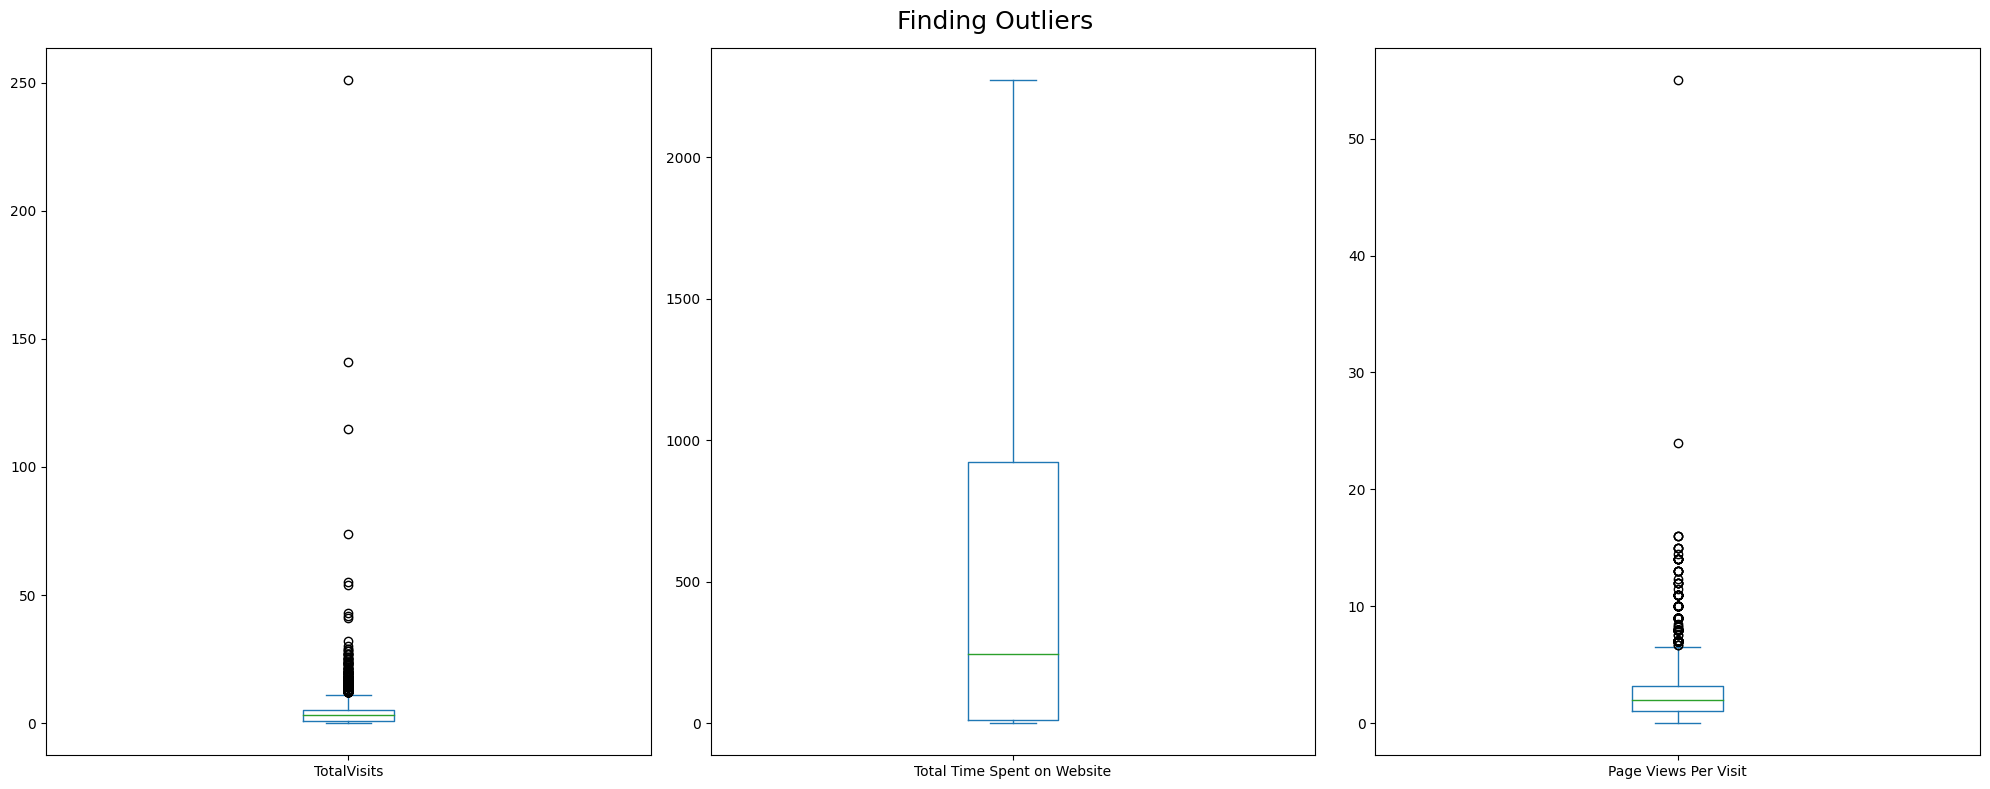

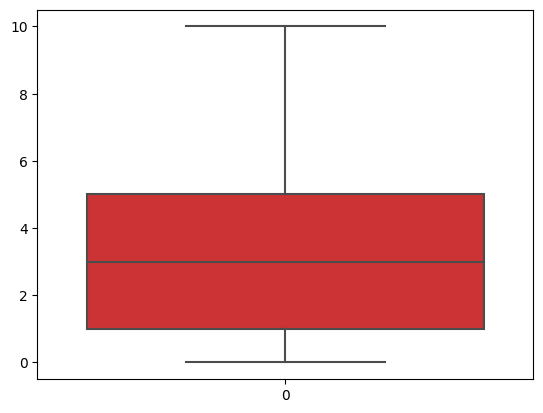

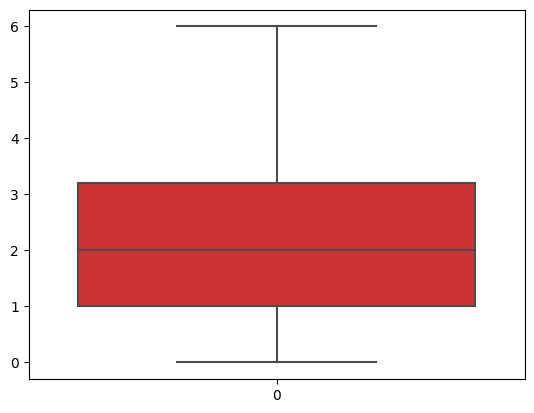

In [649]:
# Function to cap outliers in a given column based on percentiles
def cap_outliers(column_name, lower_quantile=0.05, upper_quantile=0.95):
    percentiles = lead[column_name].quantile([lower_quantile, upper_quantile]).values
    lead[column_name] = lead[column_name].clip(lower=percentiles[0], upper=percentiles[1])

# Select and display numerical columns excluding 'Converted'
numerical_cols = lead.select_dtypes(include=['float64', 'int64']).columns.drop('Converted')
print("Numerical Columns (excluding 'Converted'):")
print(numerical_cols)

# Plotting box plots for numerical columns
rows, columns = 1, 3
plt.figure(figsize=(20, 8))
plt.suptitle("Finding Outliers", fontsize=18)
for index, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, columns, index)
    lead[column].plot.box()
plt.tight_layout()
plt.show()

# Capping outliers in 'TotalVisits' and 'Page Views Per Visit'
cap_outliers('TotalVisits')
sns.boxplot(lead['TotalVisits'], palette='Set1')
plt.show()

cap_outliers('Page Views Per Visit')
sns.boxplot(lead['Page Views Per Visit'], palette='Set1')
plt.show()

## Data Imbalance Check 

In [650]:
lead.Converted.value_counts(normalize=True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

- Target column is pretty balanced.

## Bivariate Data Analysis 

##### Numerical Variable w.r.t Target Vaiable

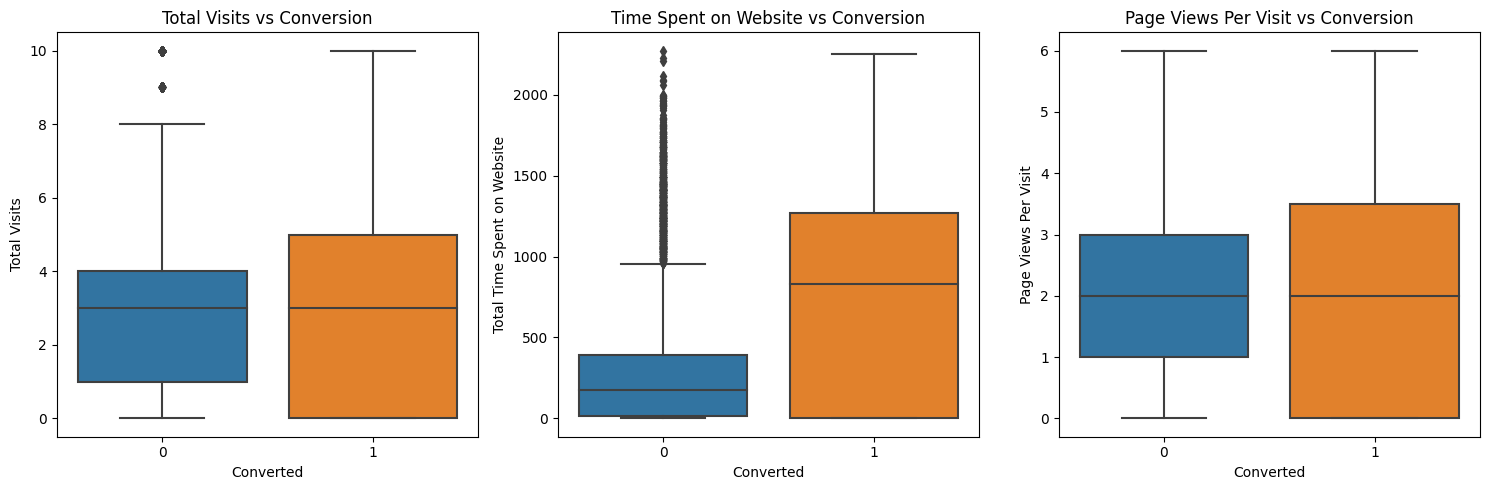

In [651]:
plt.figure(figsize=(15, 5))

# Boxplot for 'TotalVisits' vs 'Converted'
plt.subplot(1, 3, 1)
sns.boxplot(y='TotalVisits', x='Converted', data=lead)
plt.title('Total Visits vs Conversion')
plt.ylabel('Total Visits')
plt.xlabel('Converted')

# Boxplot for 'Total Time Spent on Website' vs 'Converted'
plt.subplot(1, 3, 2)
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=lead)
plt.title('Time Spent on Website vs Conversion')
plt.ylabel('Total Time Spent on Website')
plt.xlabel('Converted')

# Boxplot for 'Page Views Per Visit' vs 'Converted'
plt.subplot(1, 3, 3)
sns.boxplot(y='Page Views Per Visit', x='Converted', data=lead)
plt.title('Page Views Per Visit vs Conversion')
plt.ylabel('Page Views Per Visit')
plt.xlabel('Converted')

plt.tight_layout()
plt.show()

####  Inferences for above boxplots

- Median for converted and not converted leads are the same.
- Nothing can be concluded on the basis of Total Visits.
- Leads spending more time on the website are more likely to be converted.
- Median for converted and unconverted leads is the same.

##### Categorical variables w.r.t. Target Variable

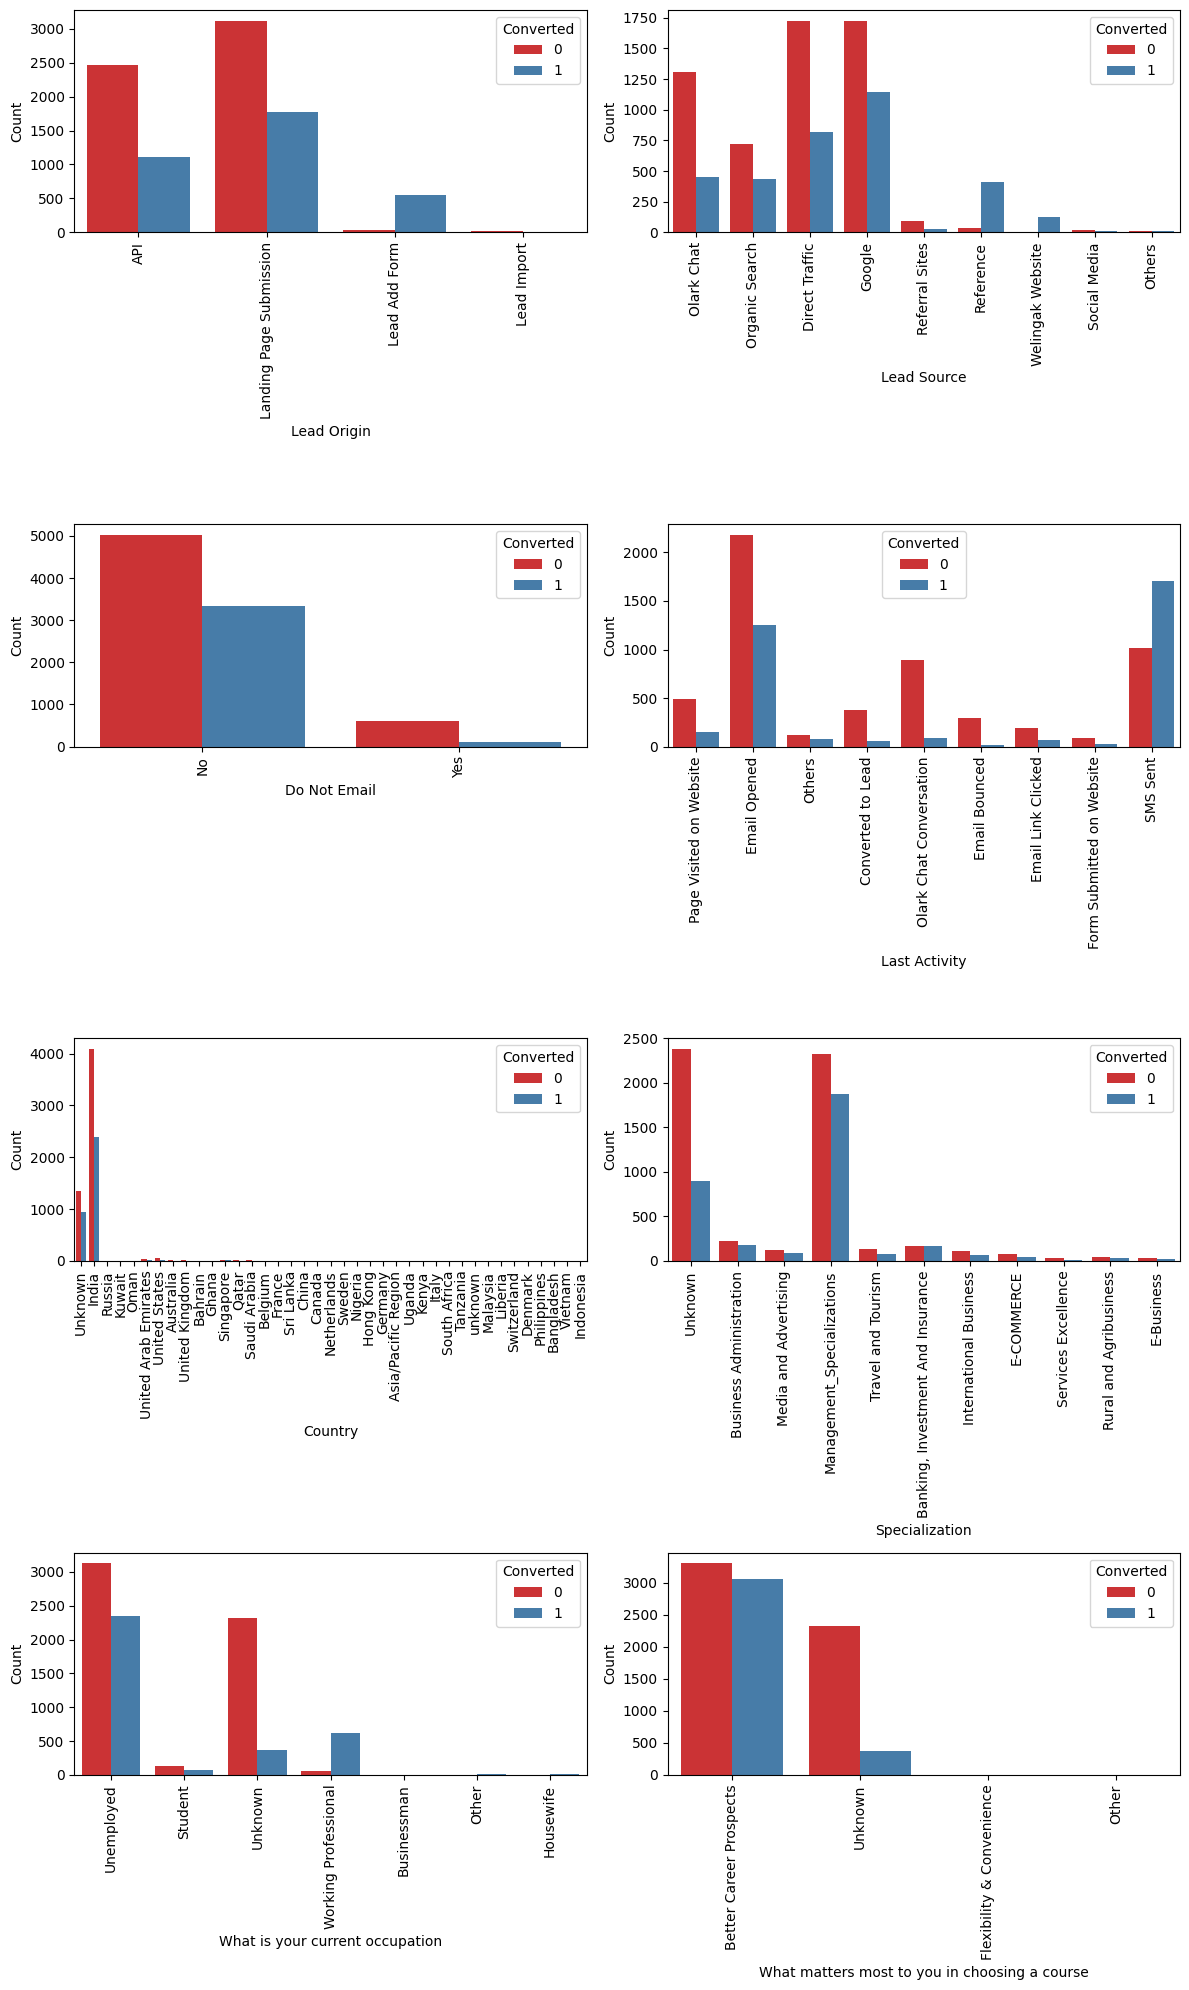

In [652]:
categorical_cols = lead.select_dtypes(include=['object']).columns

num_cols = 2  
num_rows = 4 

plt.figure(figsize=(12, 20))  

for i, var in enumerate(categorical_cols):
    if i < (num_cols * num_rows):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.countplot(x=var, hue='Converted', data=lead, palette='Set1')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- For an online education platform, country will not overall affect the conversion rate. Hence, dropping the column

In [653]:
lead.drop(['Country'],1, inplace = True)

##### Correlation between numerical varibales

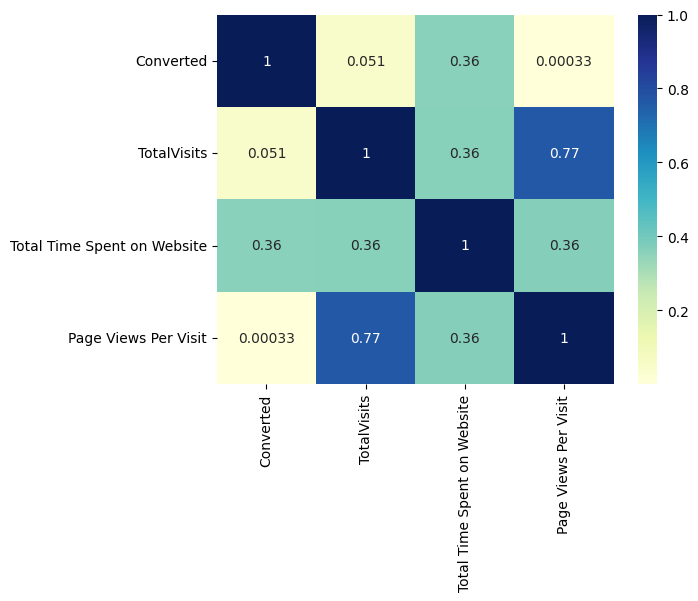

In [654]:
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Data Preparation

##### Converting binary variables (Yes/No) to 1/0

In [655]:
# Function to check if a column only contains 'Yes' and 'No'
def is_binary_yes_no(column):
    unique_values = column.dropna().unique()
    return sorted(unique_values) == ['No', 'Yes']

# Finding columns that only contain 'Yes' and 'No'
binary_yes_no_cols = [col for col in lead.columns if is_binary_yes_no(lead[col])]

# Mapping 'Yes' to 1 and 'No' to 0 in these columns
lead[binary_yes_no_cols] = lead[binary_yes_no_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Display the columns that were updated
print("Columns updated with binary mapping:")
print(binary_yes_no_cols)
lead.head(50)

Columns updated with binary mapping:
['Do Not Email', 'A free copy of Mastering The Interview']


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Unknown,Unemployed,Better Career Prospects,Interested in other courses,Unknown,0,Modified
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Unknown,Unemployed,Better Career Prospects,Ringing,Unknown,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Unknown,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Modified
5,API,Olark Chat,0,0,0.0,0,0.00,Olark Chat Conversation,Unknown,Unknown,Unknown,Unknown,Mumbai,0,Modified
6,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Management_Specializations,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Modified
7,API,Olark Chat,0,0,0.0,0,0.00,Olark Chat Conversation,Unknown,Unknown,Unknown,Unknown,Mumbai,0,Modified
8,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.00,Email Opened,Management_Specializations,Unknown,Unknown,Unknown,Thane & Outskirts,1,Email Opened
9,API,Google,0,0,4.0,58,4.00,Email Opened,Management_Specializations,Unknown,Unknown,Unknown,Mumbai,0,Email Opened


##### Creating  the Dummies for Categorical Columns

In [656]:
dummy_data = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


###### Concatenating the 'dummy_data' to the 'lead' dataframe

In [657]:
lead = pd.concat([lead, dummy_data], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [658]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], axis = 1)

In [659]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,Unknown,Unemployed,Better Career Prospects,Interested in other courses,Unknown,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,Unknown,Unemployed,Better Career Prospects,Ringing,Unknown,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,Unknown,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,...,0,0,1,0,0,0,0,0,0,0


In [660]:
# List of categorical columns to be converted into dummies
categorical_cols = ['Specialization', 'What is your current occupation', 
                    'What matters most to you in choosing a course', 'City', 'Tags']

# Loop through each categorical column, create dummies, and concatenate
for col in categorical_cols:
    # Create dummies
    dummies = pd.get_dummies(lead[col], prefix=col)
    # Drop the dummy column for 'Unknown' category
    dummies = dummies.drop([f'{col}_Unknown'], axis=1)
    # Concatenate with the lead DataFrame
    lead = pd.concat([lead, dummies], axis=1)

# Dropping the original categorical columns after creating dummies
lead = lead.drop(categorical_cols, axis=1)

# Display the first few rows of the updated DataFrame
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Data Split into Train & Test 

In [671]:
# Putting response variable to X

X = lead.drop('Converted', axis=1)

X.head()

# Putting response variable to y

y = lead['Converted']

y.head()

# Splitting the data into Train and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=75)


# Feature scaling

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_train.head()

# Feature Selection using RFE 

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=50) 
rfe = rfe.fit(X_train, y_train)

rfe.support_


# List of variables selected in top 15 list
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))

#List of RFE supported columns

rfe_col = X_train.columns[rfe.support_]
print(rfe_col)

X_train.columns[~rfe.support_]

[('Do Not Email', True, 1), ('TotalVisits', True, 1), ('Total Time Spent on Website', True, 1), ('Page Views Per Visit', True, 1), ('A free copy of Mastering The Interview', True, 1), ('Lead Origin_Landing Page Submission', True, 1), ('Lead Origin_Lead Add Form', True, 1), ('Lead Origin_Lead Import', False, 15), ('Lead Source_Google', False, 17), ('Lead Source_Olark Chat', True, 1), ('Lead Source_Organic Search', False, 2), ('Lead Source_Others', True, 1), ('Lead Source_Reference', False, 14), ('Lead Source_Referral Sites', False, 12), ('Lead Source_Social Media', False, 3), ('Lead Source_Welingak Website', True, 1), ('Last Activity_Email Bounced', False, 8), ('Last Activity_Email Link Clicked', True, 1), ('Last Activity_Email Opened', True, 1), ('Last Activity_Form Submitted on Website', True, 1), ('Last Activity_Olark Chat Conversation', True, 1), ('Last Activity_Others', True, 1), ('Last Activity_Page Visited on Website', False, 9), ('Last Activity_SMS Sent', True, 1), ('Last Notabl

Index(['Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Bounced', 'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_View in browser link Clicked',
       'Specialization_E-COMMERCE',
       'Specialization_Management_Specializations',
       'What is your current occupation_Other',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other', 'City_Mumbai',
       'City_Other Cities', 'City_Other Metro Cities',
       'City_Tha

## Building Model with StatsModels

##### Model 1

In [640]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1384.8
Date:                Mon, 20 Nov 2023   Deviance:                       2769.5
Time:                        00:44:47   Pearson chi2:                 1.50e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5885
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3098      0.075    -17.569      0.000      -1.456      -1.164
Do Not Email                                     -1.1248      0.237     -4.739      0.000      -1.590      -0.660
Lead Source_Welingak Website                      4.3102      0.737      5.847      0.000       2.865       5.755
Last Activity_SMS Sent                            2.2218      0.109     20.425      0.000       2.009       2.435
Last Notable Activity_Modified                   -1.7961      0.122    -14.779      0.000      -2.034      -1.558
Last Notable Activity_Olark Chat Conversation    -1.9736      0.505     -3.912      0.000      -2.962      -0.985
Tags_Closed by Horizzon                           7.7934      1.010      7.718      0.000       5.814       9.773
Tags_Interested  in full time MBA                -2.3173      1.014     -2.285      0.022      -4.305      -0.330
Tags_Interested in other courses                 -1.3502      0.316     -4.278      0.000      -1.969      -0.732
Tags_Lost to EINS                                 6.2595      0.600     10.425      0.000       5.083       7.436
Tags_Others                                      -2.8348      0.256    -11.064      0.000      -3.337      -2.333
Tags_Ringing                                     -3.4326      0.230    -14.931      0.000      -3.883      -2.982
Tags_Will revert after reading the email          4.8652      0.181     26.832      0.000       4.510       5.221
=================================================================================================================
"""

In [641]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Last Activity_SMS Sent,1.43
3,Last Notable Activity_Modified,1.39
11,Tags_Will revert after reading the email,1.29
0,Do Not Email,1.12
7,Tags_Interested in other courses,1.12
9,Tags_Others,1.12
10,Tags_Ringing,1.10
5,Tags_Closed by Horizzon,1.05
8,Tags_Lost to EINS,1.04
1,Lead Source_Welingak Website,1.03


##### Model 2

In [617]:
col = col.drop('What matters most to you in choosing a course_Better Career Prospects',1)

In [618]:
X_train_rfe = X_train[col]

In [619]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1379.3
Date:                Mon, 20 Nov 2023   Deviance:                       2758.7
Time:                        00:29:49   Pearson chi2:                 1.47e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5892
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2772      0.075    -17.023      0.000      -1.424      -1.130
Do Not Email                                     -1.1081      0.237     -4.675      0.000      -1.573      -0.644
Lead Source_Welingak Website                      4.2752      0.737      5.803      0.000       2.831       5.719
Last Activity_SMS Sent                            2.2039      0.109     20.221      0.000       1.990       2.418
Last Notable Activity_Modified                   -1.7769      0.122    -14.577      0.000      -2.016      -1.538
Last Notable Activity_Olark Chat Conversation    -1.9824      0.503     -3.943      0.000      -2.968      -0.997
Tags_Closed by Horizzon                           7.7453      1.010      7.670      0.000       5.766       9.725
Tags_Diploma holder (Not Eligible)               -1.9982      1.023     -1.954      0.051      -4.003       0.006
Tags_Graduation in progress                      -0.8743      0.502     -1.743      0.081      -1.857       0.109
Tags_Interested  in full time MBA                -2.3538      1.014     -2.321      0.020      -4.341      -0.366
Tags_Interested in other courses                 -1.3854      0.315     -4.393      0.000      -2.004      -0.767
Tags_Lost to EINS                                 6.2097      0.600     10.342      0.000       5.033       7.387
Tags_Others                                      -2.8577      0.256    -11.156      0.000      -3.360      -2.356
Tags_Ringing                                     -3.4512      0.230    -15.010      0.000      -3.902      -3.001
Tags_Will revert after reading the email          4.8237      0.181     26.598      0.000       4.468       5.179
=================================================================================================================
"""

##### Model 3 

In [620]:
col = col.drop('Tags_Diploma holder (Not Eligible)',1)

In [621]:
X_train_rfe = X_train[col]

In [622]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1383.0
Date:                Mon, 20 Nov 2023   Deviance:                       2766.0
Time:                        00:30:03   Pearson chi2:                 1.49e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5887
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2968      0.075    -17.337      0.000      -1.443      -1.150
Do Not Email                                     -1.1253      0.237     -4.750      0.000      -1.590      -0.661
Lead Source_Welingak Website                      4.2951      0.737      5.828      0.000       2.851       5.740
Last Activity_SMS Sent                            2.2179      0.109     20.371      0.000       2.004       2.431
Last Notable Activity_Modified                   -1.7818      0.122    -14.632      0.000      -2.020      -1.543
Last Notable Activity_Olark Chat Conversation    -1.9761      0.504     -3.924      0.000      -2.963      -0.989
Tags_Closed by Horizzon                           7.7686      1.010      7.693      0.000       5.789       9.748
Tags_Graduation in progress                      -0.8574      0.502     -1.708      0.088      -1.841       0.126
Tags_Interested  in full time MBA                -2.3345      1.014     -2.302      0.021      -4.322      -0.347
Tags_Interested in other courses                 -1.3674      0.316     -4.333      0.000      -1.986      -0.749
Tags_Lost to EINS                                 6.2342      0.600     10.382      0.000       5.057       7.411
Tags_Others                                      -2.8462      0.256    -11.107      0.000      -3.348      -2.344
Tags_Ringing                                     -3.4427      0.230    -14.971      0.000      -3.893      -2.992
Tags_Will revert after reading the email          4.8452      0.181     26.714      0.000       4.490       5.201
=================================================================================================================
"""

##### Model 4 

In [623]:
col = col.drop('Tags_Graduation in progress',1)

In [624]:
X_train_rfe = X_train[col]

In [625]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1384.8
Date:                Mon, 20 Nov 2023   Deviance:                       2769.5
Time:                        00:31:03   Pearson chi2:                 1.50e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5885
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3098      0.075    -17.569      0.000      -1.456      -1.164
Do Not Email                                     -1.1248      0.237     -4.739      0.000      -1.590      -0.660
Lead Source_Welingak Website                      4.3102      0.737      5.847      0.000       2.865       5.755
Last Activity_SMS Sent                            2.2218      0.109     20.425      0.000       2.009       2.435
Last Notable Activity_Modified                   -1.7961      0.122    -14.779      0.000      -2.034      -1.558
Last Notable Activity_Olark Chat Conversation    -1.9736      0.505     -3.912      0.000      -2.962      -0.985
Tags_Closed by Horizzon                           7.7934      1.010      7.718      0.000       5.814       9.773
Tags_Interested  in full time MBA                -2.3173      1.014     -2.285      0.022      -4.305      -0.330
Tags_Interested in other courses                 -1.3502      0.316     -4.278      0.000      -1.969      -0.732
Tags_Lost to EINS                                 6.2595      0.600     10.425      0.000       5.083       7.436
Tags_Others                                      -2.8348      0.256    -11.064      0.000      -3.337      -2.333
Tags_Ringing                                     -3.4326      0.230    -14.931      0.000      -3.883      -2.982
Tags_Will revert after reading the email          4.8652      0.181     26.832      0.000       4.510       5.221
=================================================================================================================
"""

In [626]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Last Activity_SMS Sent,1.43
3,Last Notable Activity_Modified,1.39
11,Tags_Will revert after reading the email,1.29
0,Do Not Email,1.12
7,Tags_Interested in other courses,1.12
9,Tags_Others,1.12
10,Tags_Ringing,1.10
5,Tags_Closed by Horizzon,1.05
8,Tags_Lost to EINS,1.04
1,Lead Source_Welingak Website,1.03


##### Getting the predicted values on the train set

In [662]:
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3167    0.212523
4637    0.015602
9040    0.042867
6170    0.996912
6950    0.074427
5676    0.008643
1178    0.212523
6864    0.212523
4331    0.972223
221     0.004394
dtype: float64

In [663]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21252289, 0.01560201, 0.04286668, 0.99691203, 0.07442696,
       0.00864257, 0.21252289, 0.21252289, 0.97222279, 0.00439363])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [664]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.212523,3167
1,0,0.015602,4637
2,1,0.042867,9040
3,1,0.996912,6170
4,0,0.074427,6950


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0 

In [665]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [666]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.212523,3167,0
1,0,0.015602,4637,0
2,1,0.042867,9040,0
3,1,0.996912,6170,1
4,0,0.074427,6950,0


##### Making a Confusion Metrix

In [667]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3831  133]
 [ 328 2059]]


##### Checking the overall accuracy

In [669]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.9274130058258542


##### Metrics beyond Accuracy  

In [634]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

##### Sensitivity 

In [635]:
TP / float(TP+FN)

0.8625890238793464

##### Specificity 

In [636]:
TN / float(TN+FP)

0.9664480322906155

##### False Positive Rate 

In [637]:
print(FP/ float(TN+FP))

0.03355196770938446


##### Positive Predictive Value 

In [638]:
print (TP / float(TP+FP))

0.9393248175182481


##### Negative Predictive Value

In [639]:
print (TN / float(TN+ FN))

0.9211348881942775


## ROC Curve 

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

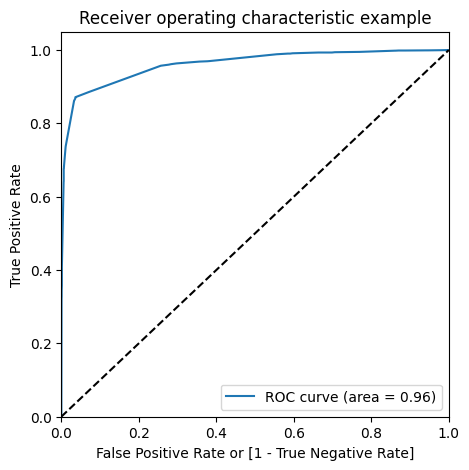

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- The ROC Curve should be a value close to 1. We are getting a good value of 0.96 indicating a good predictive model.

## Finding Optimal Cut-off 

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

##### Creating columns with different probability cutoffs 

In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.212523,3167,0,1,1,1,0,0,0,0,0,0,0
1,0,0.015602,4637,0,1,0,0,0,0,0,0,0,0,0
2,1,0.042867,9040,0,1,0,0,0,0,0,0,0,0,0
3,1,0.996912,6170,1,1,1,1,1,1,1,1,1,1,1
4,0,0.074427,6950,0,1,0,0,0,0,0,0,0,0,0


##### Calculating accuracy sensitivity and specificity for various probability cutoffs. 

In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375846  1.000000  0.000000
0.1   0.1  0.808849  0.961458  0.716953
0.2   0.2  0.823650  0.957269  0.743189
0.3   0.3  0.928988  0.871387  0.963673
0.4   0.4  0.927885  0.868454  0.963673
0.5   0.5  0.927413  0.862589  0.966448
0.6   0.6  0.927413  0.862589  0.966448
0.7   0.7  0.927570  0.862170  0.966953
0.8   0.8  0.894032  0.736908  0.988648
0.9   0.9  0.876397  0.682866  0.992936


##### Plotting accuracy sensitivity and specificity for various probabilities 

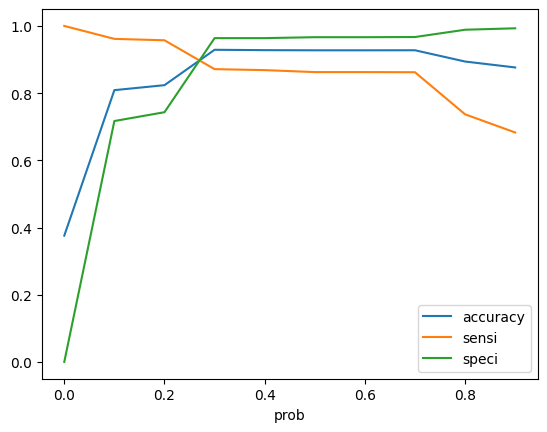

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.3 (approximately) is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.212523,3167,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.015602,4637,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.042867,9040,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.996912,6170,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.074427,6950,0,1,0,0,0,0,0,0,0,0,0,0


##### Assigning Lead Score to the Training data 

In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.212523,3167,0,1,1,1,0,0,0,0,0,0,0,0,21
1,0,0.015602,4637,0,1,0,0,0,0,0,0,0,0,0,0,2
2,1,0.042867,9040,0,1,0,0,0,0,0,0,0,0,0,0,4
3,1,0.996912,6170,1,1,1,1,1,1,1,1,1,1,1,1,100
4,0,0.074427,6950,0,1,0,0,0,0,0,0,0,0,0,0,7


## Model Evaluation

##### Overall Accuracy

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.9289875610140136


##### Creating Confusion Metrix 

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

confusion2

array([[3820,  144],
       [ 307, 2080]], dtype=int64)

In [ ]:
TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

##### Sensitivity

In [ ]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8713866778382907


##### Specificity 

In [ ]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.963673057517659


##### False Positive Rate

In [ ]:
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.03632694248234107


##### Positive Predictive Value

In [ ]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.935251798561151


##### Negative Predictive Value 

In [ ]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.9256118245699055


##### Precision & Recall

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3831,  133],
       [ 328, 2059]], dtype=int64)

In [ ]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.9393248175182481


In [ ]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.8625890238793464


##### Precision and Recall Tradeoff 

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       0
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### Trade-off Curve between Precision and Recall 

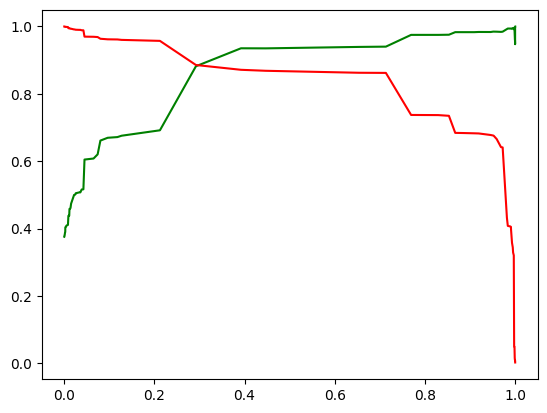

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predictions on the Test Set 

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [ ]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
5195,0,0,1,0,0,0,0,0,0,0,0,1
1171,0,0,0,0,0,0,0,0,0,0,0,1
764,0,0,0,1,0,0,0,0,0,0,0,1
2261,0,0,0,1,0,0,0,1,0,0,0,0
5508,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

5195    0.996912
1171    0.972223
764     0.853123
2261    0.011475
5508    0.713408
886     0.008643
3067    0.008643
1579    0.002623
8890    0.013169
433     0.008643
dtype: float64

In [ ]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5195,0.996912
1171,0.972223
764,0.853123
2261,0.011475
5508,0.713408


In [ ]:
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_test_df['Prospect ID'] = y_test_df.index

##### Removing index for both dataframes to append them side by side 

In [ ]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,5195,0.996912
1,1,1171,0.972223
2,1,764,0.853123
3,0,2261,0.011475
4,0,5508,0.713408


In [ ]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,5195,0.996912
1,1,1171,0.972223
2,1,764,0.853123
3,0,2261,0.011475
4,0,5508,0.713408


In [ ]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5195,1,0.996912,100
1,1171,1,0.972223,97
2,764,1,0.853123,85
3,2261,0,0.011475,1
4,5508,0,0.713408,71


In [ ]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,Final_Predicted
0,5195,1,0.996912,100,1
1,1171,1,0.972223,97,1
2,764,1,0.853123,85,1
3,2261,0,0.011475,1,0
4,5508,0,0.713408,71,1


##### Overall Accuracy 

In [ ]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.914799853103195

##### Confusion Matrix

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

array([[1601,   74],
       [ 158,  890]], dtype=int64)

In [ ]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

##### Sensitivity 

In [ ]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8492366412213741


##### Specificity 

In [ ]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.955820895522388


##### Precision Score

In [ ]:
print("Precision :",precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted))

Precision : 0.9232365145228216


##### Recall

In [ ]:
print("Recall :",recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

Recall : 0.8492366412213741


##### Assigning Lead Score to the Testing data 

In [ ]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,Final_Predicted
0,5195,1,0.996912,100,1
1,1171,1,0.972223,97,1
2,764,1,0.853123,85,1
3,2261,0,0.011475,1,0
4,5508,0,0.713408,71,1


## Results

##### Comparing the values obtained for Train & Test:

**Train Data:**
- Accuracy : 92.8 %
- Sensitivity : 87.1 %
- Specificity : 96.3 %
- Precision: 93.9 %
- Recall: 86.2 %

**Test Data:**
- Accuracy : 91.4 %
- Sensitivity : 84.9 %
- Specificity : 95.5 %
- Precision: 92.3 %
- Recall: 84.9 %

##### Leads which should be contacted:

In [672]:
top_leads = y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
top_leads

,Prospect ID,Converted,Converted_prob,Lead_Score,Final_Predicted
0,5195,1,0.996912,100,1
1,1171,1,0.972223,97,1
2,764,1,0.853123,85,1
13,808,1,0.998474,100,1
15,4880,1,0.972223,97,1
...,...,...,...,...,...
2694,913,1,0.998474,100,1
2697,4182,0,0.853123,85,1
2699,8673,1,0.992965,99,1
2701,1467,1,0.996912,100,1
